In [48]:
import time
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# suponagmos que esta es nuestra funcion de verosimilitud
# f(x,y) = 1/3 x**3 + 1/2 x**2 + 2xy + 1/2 y**2 - y + 9 

def f(p):
    (x,y) = p
    return 1/3*x**3 + 1/2*x**2 + 2*x*y + 1/2*y**2 - y + 9


def f_prime(p):
    (x,y) = p
    dfx = x**2 + x + 2*y
    dfy = 2*x + y - 1
    return np.array([dfx,dfy])


def hessian(p):
    (x,y) = p
    d_dfx_x = 2*x + 1
    d_dfx_y = 2
    d_dfy_x = 2
    d_dfy_y = 1
    return np.array([[d_dfx_x,d_dfx_y],[d_dfy_x,d_dfy_y]])

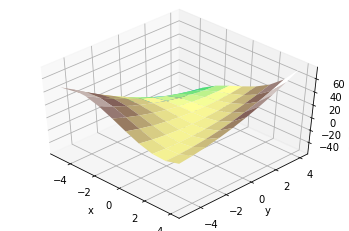

In [64]:
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-5, 5)
y = np.arange(-5, 5)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, f(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')

plt.show()



In [59]:
# A reference but slow solution:
t0 = time.time()

# punto inicial

P = np.array([5,-5])

x_ref = optimize.minimize(f, P, method="Powell",options={'disp': True}).x
print('     Powell: time %.2fs' % (time.time() - t0))
f_ref = f(x_ref)
print("solucion con metodo: Powell, ({},{})".format(x_ref[0],x_ref[1]))

print(" ")

# Compare different approaches
t0 = time.time()
x_bfgs = optimize.minimize(f, P, method="BFGS",options={'disp': True}).x
print('       BFGS: time %.2fs, x error %.2f, f error %.2f' % (time.time() - t0,
    np.sqrt(np.sum((x_bfgs - x_ref)**2)), f(x_bfgs) - f_ref))
print("solucion con metodo: BFGS, ({},{})".format(x_bfgs[0],x_bfgs[1]))

print(" ")

t0 = time.time()
x_l_bfgs = optimize.minimize(f, P, method="L-BFGS-B",options={'disp': True}).x
print('     L-BFGS: time %.2fs, x error %.2f, f error %.2f' % (time.time() - t0,
    np.sqrt(np.sum((x_l_bfgs - x_ref)**2)), f(x_l_bfgs) - f_ref))
print("solucion con metodo: L-BFGS-B, ({},{})".format(x_l_bfgs[0],x_l_bfgs[1]))

print(" ")

t0 = time.time()
x_bfgs = optimize.minimize(f, P, jac=f_prime, method="BFGS",options={'disp': True}).x
print("  BFGS w f': time %.2fs, x error %.2f, f error %.2f" % (
    time.time() - t0, np.sqrt(np.sum((x_bfgs - x_ref)**2)),
    f(x_bfgs) - f_ref))
print("solucion con metodo: BFGS, ({},{})".format(x_bfgs[0],x_bfgs[1]))

print(" ")

t0 = time.time()
x_l_bfgs = optimize.minimize(f, P, jac=f_prime, method="L-BFGS-B",options={'disp': True}).x
print("L-BFGS w f': time %.2fs, x error %.2f, f error %.2f" % (
    time.time() - t0, np.sqrt(np.sum((x_l_bfgs - x_ref)**2)),
    f(x_l_bfgs) - f_ref))
print("solucion con metodo: L-BFGS-B, ({},{})".format(x_l_bfgs[0],x_l_bfgs[1]))

print(" ")

t0 = time.time()
x_newton = optimize.minimize(f, P, jac=f_prime, hess=hessian, method="Newton-CG",options={'disp': True}).x
print("     Newton: time %.2fs, x error %.2f, f error %.2f" % (
    time.time() - t0, np.sqrt(np.sum((x_newton - x_ref)**2)),
    f(x_newton) - f_ref))
print("solucion con metodo: Newton-CG, ({},{})".format(x_newton[0],x_newton[1]))

Optimization terminated successfully.
         Current function value: 9.171289
         Iterations: 10
         Function evaluations: 277
     Powell: time 0.01s
solucion con metodo: Powell, (1.9026842849133128,-2.7856665229683304)
 
Optimization terminated successfully.
         Current function value: 9.166667
         Iterations: 10
         Function evaluations: 44
         Gradient evaluations: 11
       BFGS: time 0.00s, x error 0.24, f error -0.00
solucion con metodo: BFGS, (1.9999833801341869,-2.9999627868854093)
 
     L-BFGS: time 0.00s, x error 0.24, f error -0.00
solucion con metodo: L-BFGS-B, (1.999999757119234,-3.000000477733501)
 
Optimization terminated successfully.
         Current function value: 9.166667
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
  BFGS w f': time 0.00s, x error 0.24, f error -0.00
solucion con metodo: BFGS, (1.9999833058873733,-2.999962523636919)
 
L-BFGS w f': time 0.01s, x error 0.24, f error -0.0